# CUSTOMER SEGMENTATİON CLUSTERİNG

In [2]:
# IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors

from sklearn.preprocessing import LabelEncoder,StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 
from sklearn.cluster import AgglomerativeClustering
import plotly.graph_objs as go
import plotly.offline as py

from warnings import filterwarnings
filterwarnings('ignore')#ignore warning messages 
import warnings as wrn
wrn.filterwarnings('ignore',category=DeprecationWarning)
wrn.filterwarnings('ignore',category=FutureWarning)
wrn.filterwarnings('ignore',category=UserWarning)

In [3]:
# LOADING DATA SET 
pd.set_option('display.max_columns',None)
df=pd.read_csv('/kaggle/input/marketsegmentcluster/marketing_campaign.csv',sep='\t')
print("Number of datapoints:", len(df))
df.head()

Number of datapoints: 2240


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


# DATA CLEANING

In [4]:
#Information on features 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
#checking the number of spaces
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
df.Marital_Status.value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [7]:
df.Education.value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

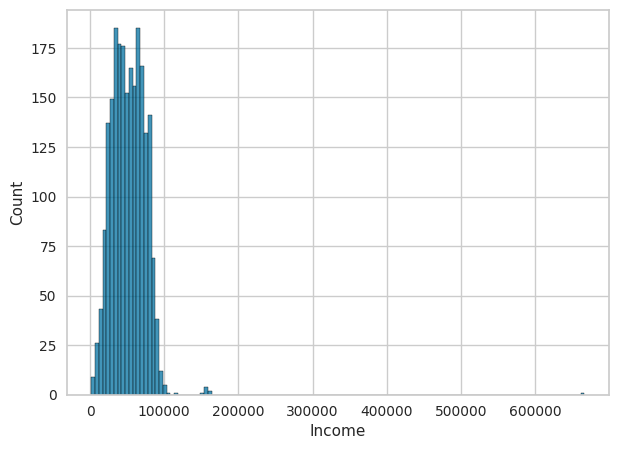

In [8]:
#histogram of income
plt.figure(figsize=(7,5))
sns.histplot(df["Income"]);

In [9]:
#To remove the NA values
df=df.dropna()

In [10]:
#checking the number of spaces again
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [11]:
df.shape

(2216, 29)

In [12]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"],format='%d-%m-%Y')
dates = []
for i in df["Dt_Customer"]:
    i = i.date()
    
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


In [13]:
days=[]
d1=max(dates)
for i in dates:
    delta=d1-i
    days.append(delta)
df['Customer_For']=days
df["Customer_For"] = pd.to_numeric(df["Customer_For"], errors="coerce")

# Feature Engineering;

In [14]:
df['Age']=2024-df['Year_Birth']
df['Spent']=df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

df['Living_With']=df['Marital_Status'].replace({'Married':'Partner','Together':'Partner','Absurd':'Alone','Widow':'Alone','YOLO':'Alone','Divorced':'Alone','Single':'Alone',})


df['Children']=df['Kidhome']+df['Teenhome']

df['Family_Size']=df['Living_With'].replace({'Alone':1,'Partner':2}) +df['Children']


df['Is_Parent']=np.where(df.Children>0,1,0)

df['Education']=df['Education'].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
#Dropping some of the redundant features
df=df.drop(to_drop,axis=1)

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2216.0,5.224725e+04,2.517308e+04,1730.0,3.530300e+04,5.138150e+04,6.852200e+04,6.666660e+05
Kidhome,2216.0,4.417870e-01,5.368962e-01,0.0,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00
Teenhome,2216.0,5.054152e-01,5.441812e-01,0.0,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00
Recency,2216.0,4.901264e+01,2.894835e+01,0.0,2.400000e+01,4.900000e+01,7.400000e+01,9.900000e+01
Wines,2216.0,3.050916e+02,3.373279e+02,0.0,2.400000e+01,1.745000e+02,5.050000e+02,1.493000e+03
Fruits,2216.0,2.635605e+01,3.979392e+01,0.0,2.000000e+00,8.000000e+00,3.300000e+01,1.990000e+02
Meat,2216.0,1.669959e+02,2.242833e+02,0.0,1.600000e+01,6.800000e+01,2.322500e+02,1.725000e+03
Fish,2216.0,3.763764e+01,5.475208e+01,0.0,3.000000e+00,1.200000e+01,5.000000e+01,2.590000e+02
Sweets,2216.0,2.702888e+01,4.107205e+01,0.0,1.000000e+00,8.000000e+00,3.300000e+01,2.620000e+02
Gold,2216.0,4.396525e+01,5.181541e+01,0.0,9.000000e+00,2.450000e+01,5.600000e+01,3.210000e+02


<Figure size 2500x1000 with 0 Axes>

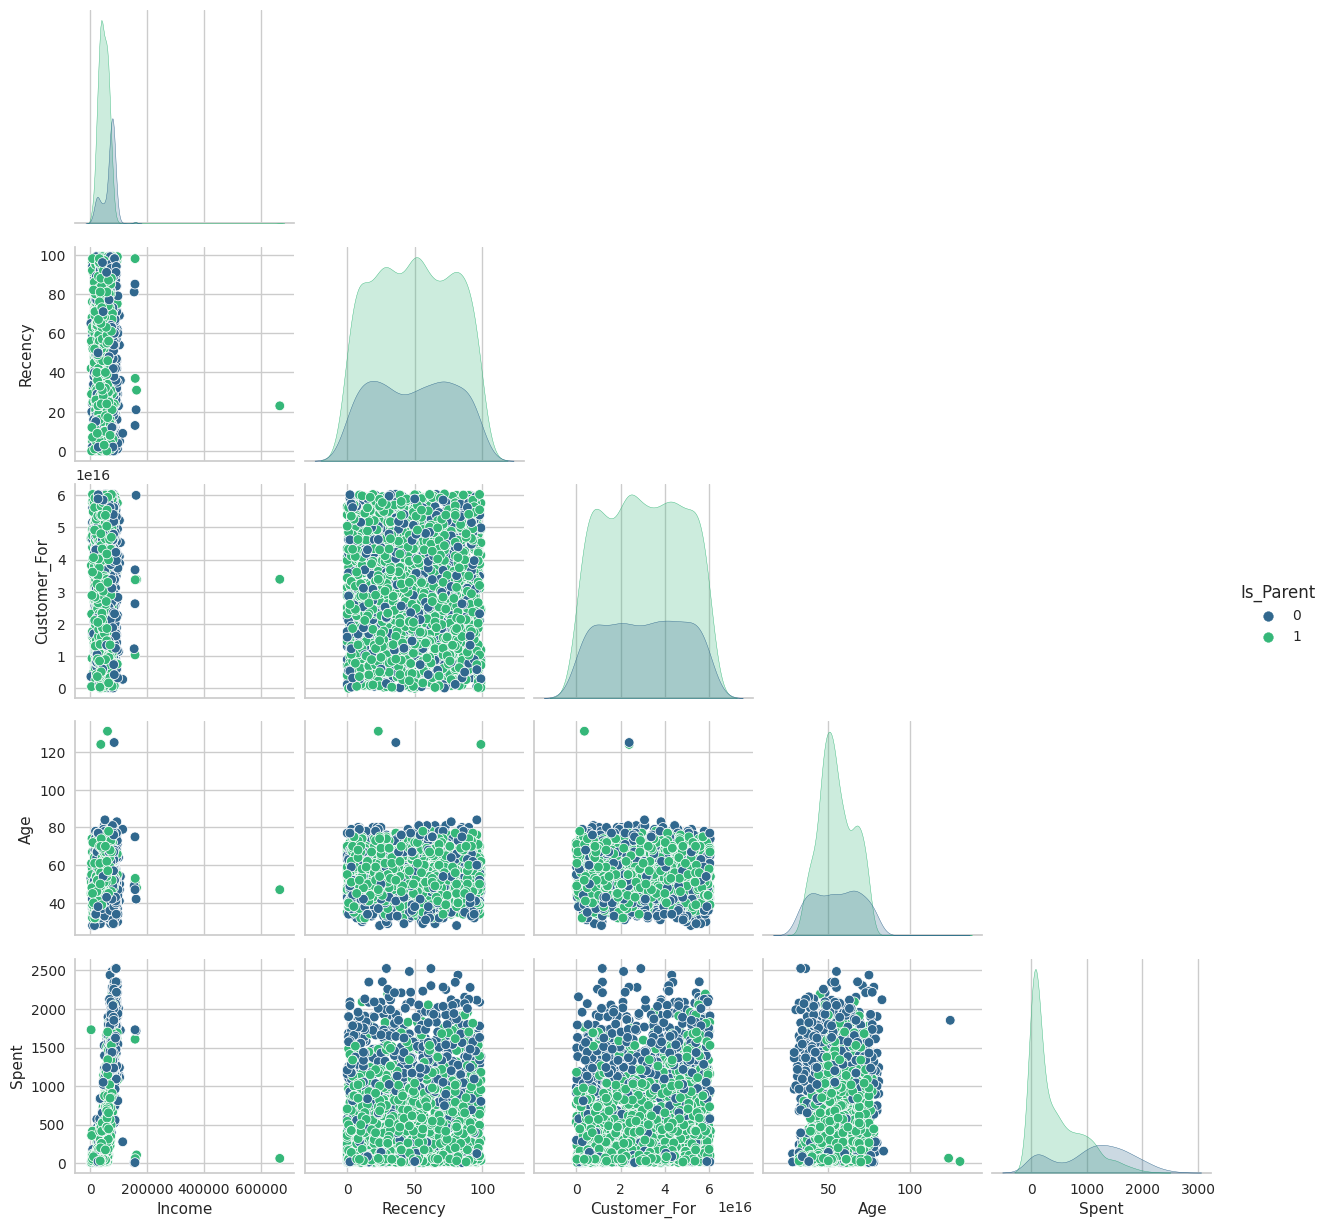

In [16]:
# pairplot for se columns;
to_plot = ["Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
plt.figure(figsize=(25,10))
ax=sns.pairplot(df[to_plot],hue='Is_Parent',palette='viridis',corner=True)
plt.show()

In [17]:
#Dropping the outliers by setting a cap on Age and income;
df=df[(df['Age']<90)]
df=df[(df['Income']<600000)]

In [18]:
df.shape

(2212, 30)

In [19]:
df.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Customer_For',
       'Age', 'Spent', 'Living_With', 'Children', 'Family_Size', 'Is_Parent'],
      dtype='object')

In [20]:
cor=['Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Customer_For',
       'Age', 'Spent', 'Children', 'Family_Size', 'Is_Parent']

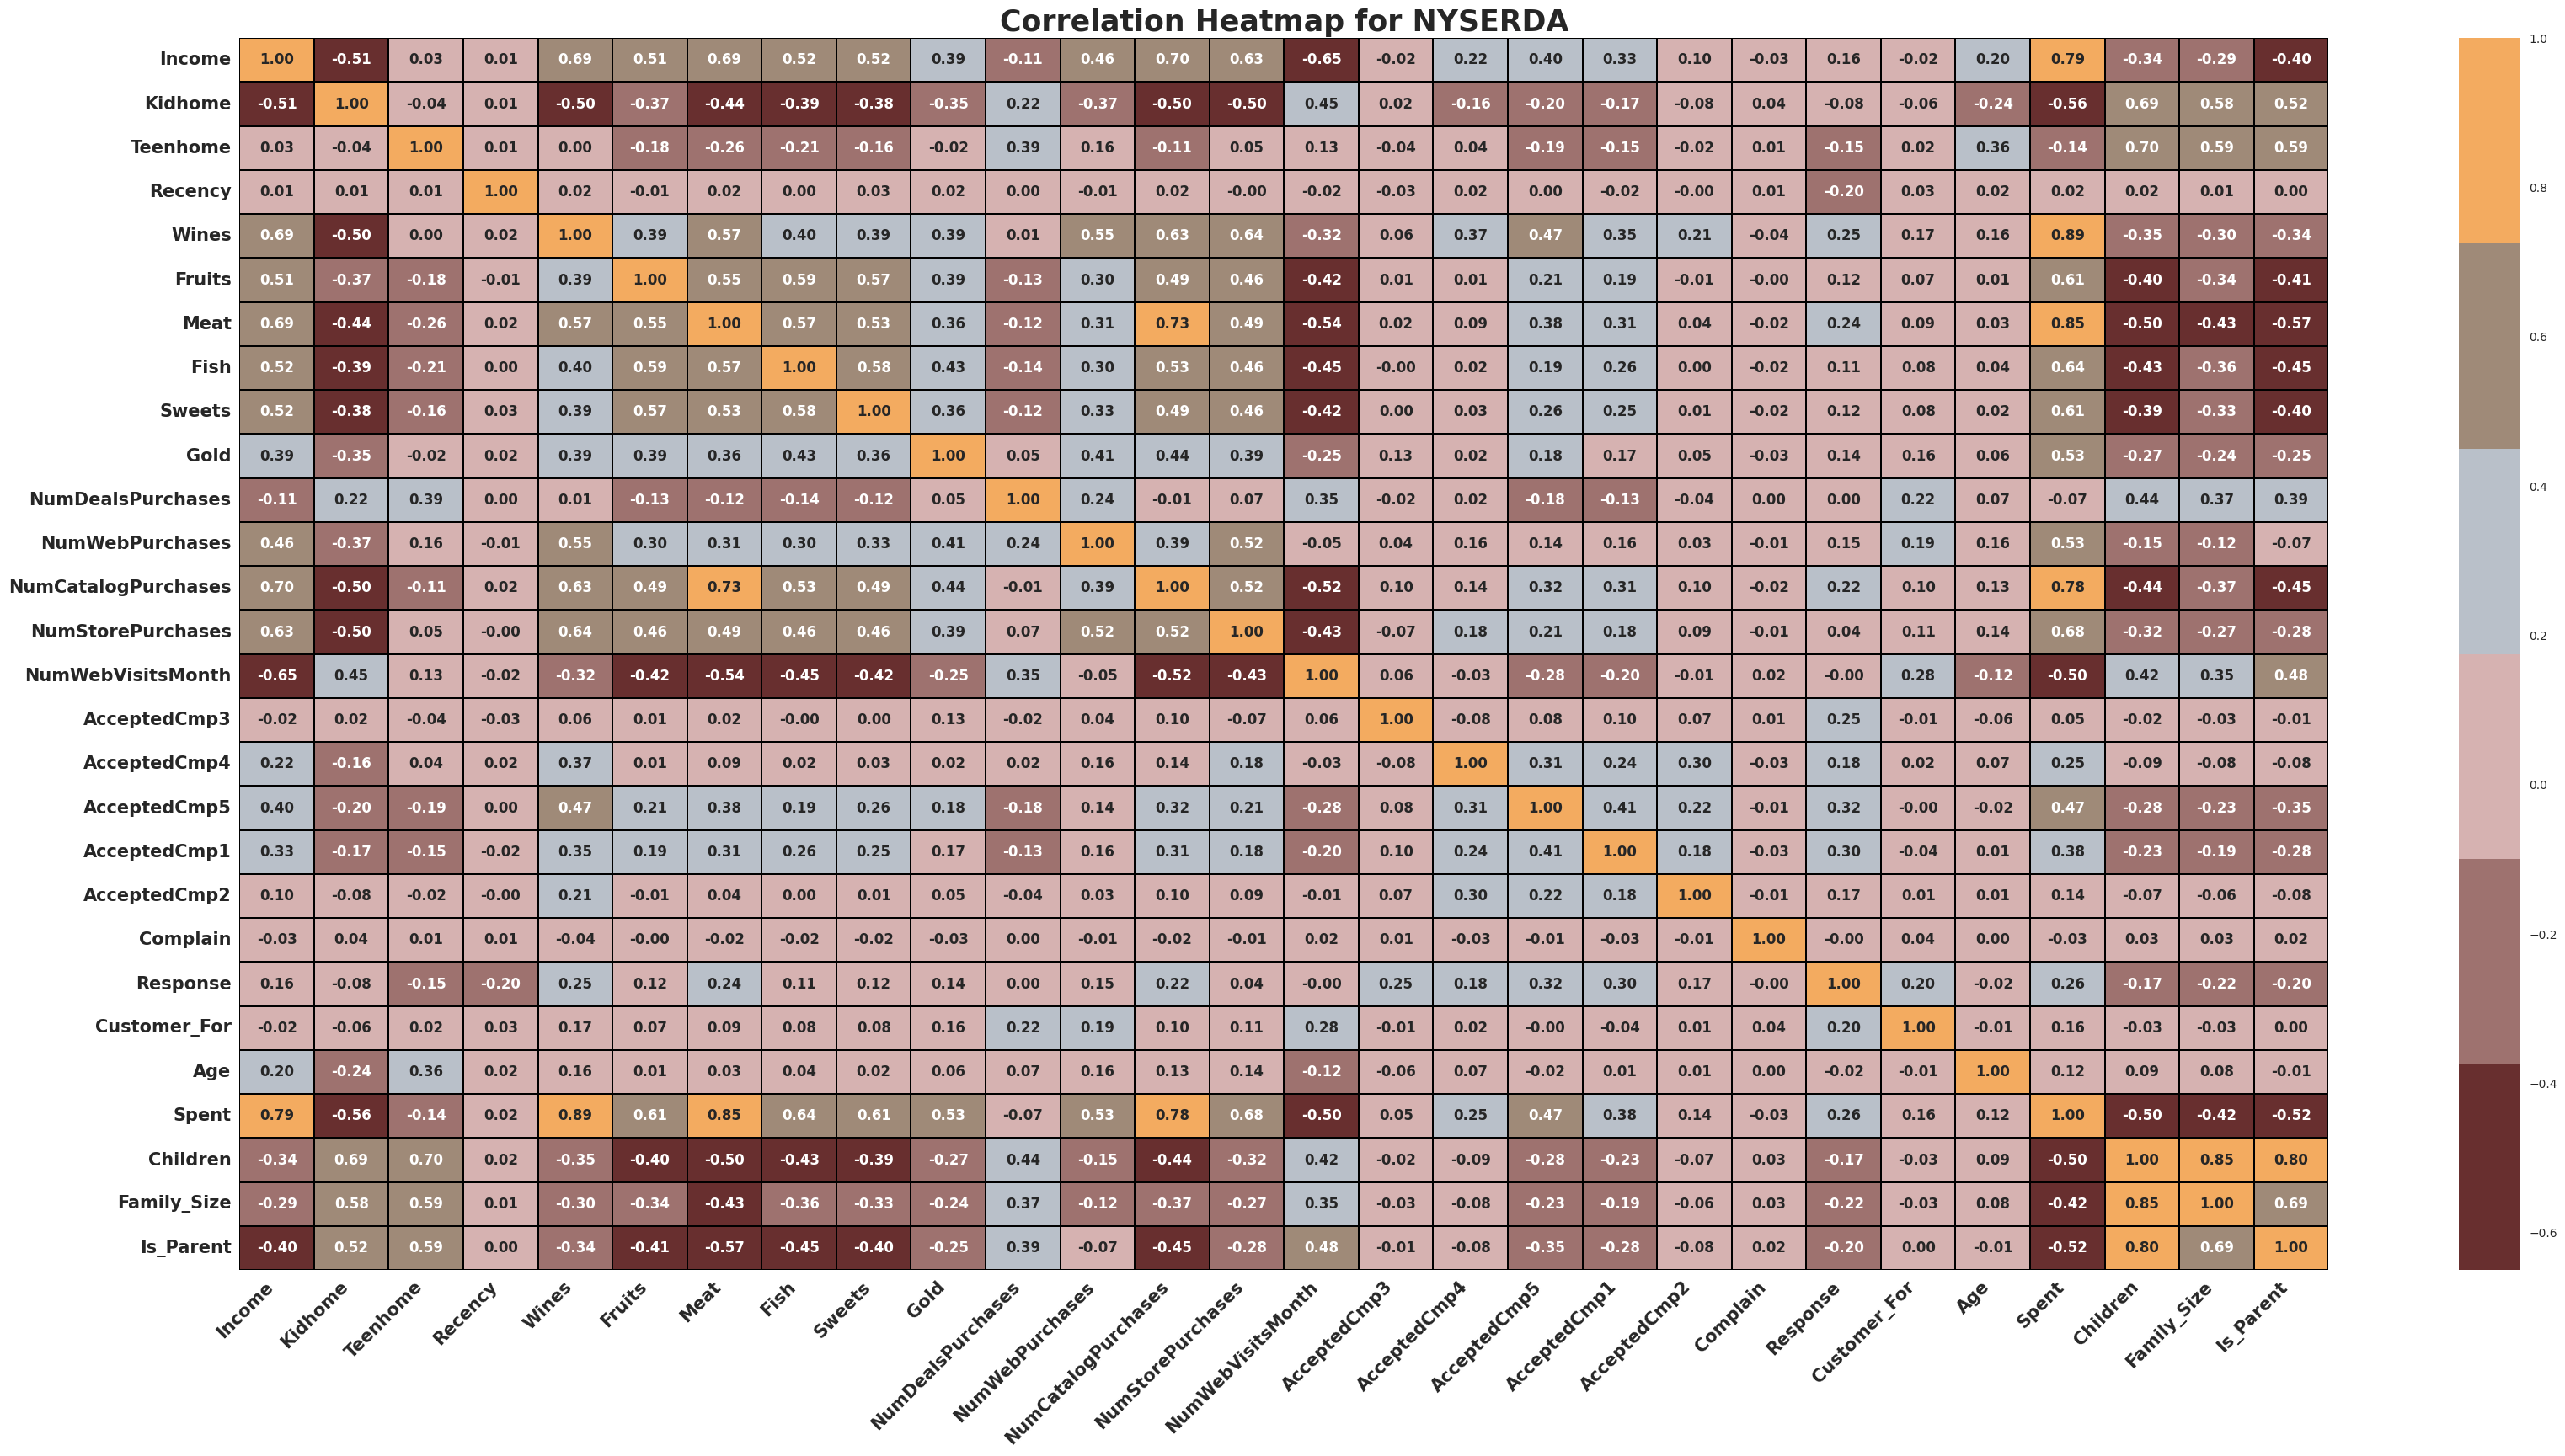

In [21]:
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting following features
# Heatmap of data
plt.figure(figsize=(40,19))
ax=sns.heatmap(df[cor].corr(), annot=True,fmt='.2f',linewidths=0.3,linecolor='black', cmap=cmap)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right',fontsize=15,fontweight='bold')
ax.set_yticklabels(ax.get_yticklabels(),fontsize=15,fontweight='bold')


for text in ax.texts:
    text.set_size(12)
    text.set_weight('bold')
plt.title('Correlation Heatmap for NYSERDA',fontsize=25,fontweight='bold');

# DATA PREPROCESSING;

In [22]:
# Kategorik değişkenlerin listesini alın;
s=(df.dtypes=='object')
object_cols=list(s[s].index)
object_cols

['Education', 'Living_With']

In [23]:
#Label Encoding the object dtypes;

le=LabelEncoder()
for i in object_cols:
    df[i]=df[[i]].apply(le.fit_transform)

print("All features are now numerical")

All features are now numerical


In [24]:

ds = df.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
ds = ds.select_dtypes(include=['int64', 'float64'])
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [25]:
scaled_ds

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,0.351030,1.426865,2.503607,-0.555814,0.692181,1.527721,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,-0.168701,-1.126420,-0.571340,-1.171160,-0.132545,-1.189011,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,-0.688432,1.426865,-0.229679,1.290224,-0.544908,-0.206048,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,-0.168701,-0.761665,-0.913000,-0.555814,0.279818,-1.060584,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,1.390492,0.332600,0.111982,0.059532,-0.132545,-0.951915,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,-0.893586,0.430444,-0.822754,0.908097,-0.104347,1.197084,0.419540,0.066770,0.079461,2.213965,3.928291,-0.168701,1.791619,0.111982,-0.555814,-0.132545,0.134778,0.163575,1.218061,0.740959,0.069987,0.449070,0.632456
2208,0.571657,0.560123,2.902796,0.908097,0.241237,0.298631,-0.662628,-0.611184,-0.687527,-0.658360,-0.694954,2.429954,1.426865,-0.229679,-0.248141,0.692181,-1.653326,1.958607,-0.271040,0.740959,2.739158,2.656499,0.632456
2209,-0.893586,0.233347,-0.822754,-0.929699,1.450778,1.787156,0.545373,0.222878,-0.103155,-0.366260,-0.385448,-0.688432,-0.761665,0.111982,2.213242,0.279818,-0.981552,-1.033114,1.052052,-1.349603,-1.264598,-1.758359,-1.581139
2210,0.571657,0.803172,-0.822754,0.908097,-1.417564,0.363866,0.092373,0.209498,0.773403,0.071892,0.330284,-0.168701,0.697355,0.795303,1.290224,-0.957271,-0.976612,1.103830,0.391336,0.740959,0.069987,0.449070,0.632456


In [26]:
pca=PCA(n_components=3)
pca.fit(scaled_ds)
Pca_ds=pd.DataFrame(pca.transform(scaled_ds),columns=['col1','col2','col3'])

In [27]:
Pca_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,3.854662e-17,2.878602,-5.978124,-2.539470,-0.781595,2.386379,7.452914
col2,2212.0,-1.927331e-17,1.709469,-4.194744,-1.323813,-0.173491,1.234537,6.167751
col3,2212.0,9.114670e-17,1.231686,-3.623881,-0.854232,-0.051165,0.863452,6.748273


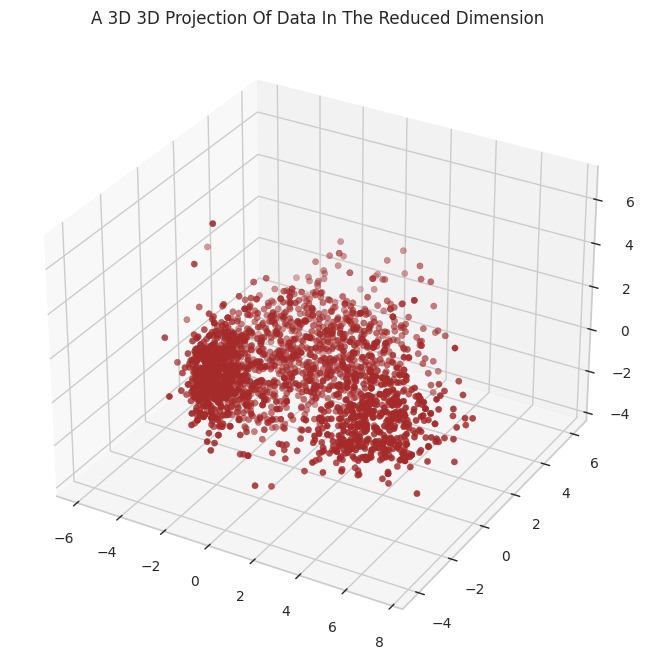

In [28]:
x=Pca_ds['col1']
y=Pca_ds['col2']
z=Pca_ds['col3']
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(x,y,z,c='brown',marker='o')
ax.set_title('A 3D 3D Projection Of Data In The Reduced Dimension')
plt.show()

# CLUSTERING;

Elbow Method to determine the number of clusters to be formed:


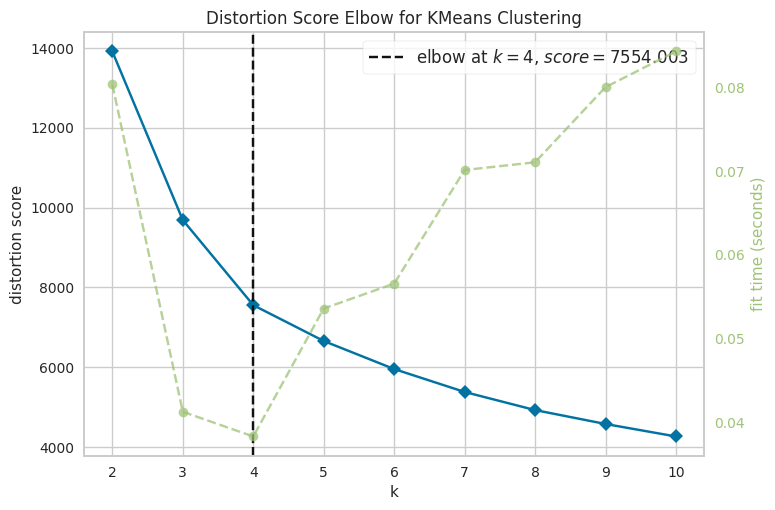

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M=KElbowVisualizer(KMeans(),k=10)
Elbow_M.fit(Pca_ds)
Elbow_M.show()

In [30]:
pca.explained_variance_ratio_

array([0.36011321, 0.1269984 , 0.06592862])

In [31]:
#Initiating the Agglomerative Clustering model 
AC=AgglomerativeClustering(n_clusters=4)
yhat_Ac=AC.fit_predict(Pca_ds)

Pca_ds['Cluster']=yhat_Ac
df['Cluster']=yhat_Ac

In [32]:
AC.labels_

array([2, 0, 2, ..., 2, 1, 0])

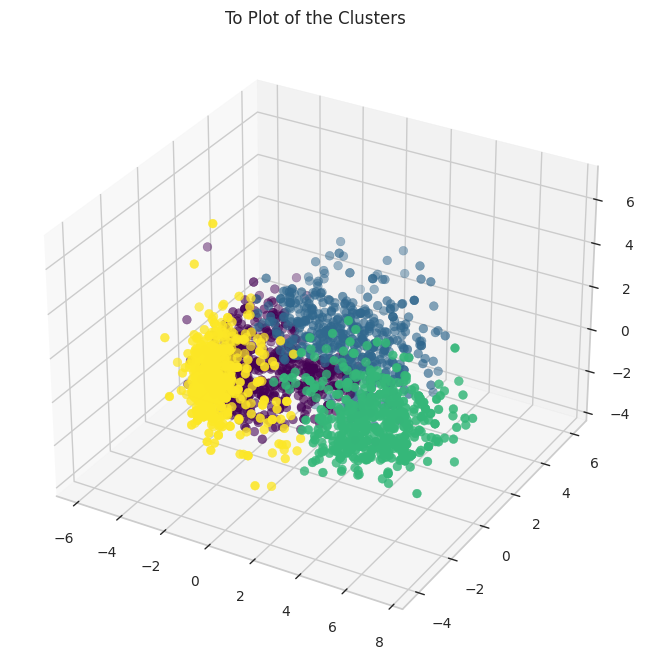

In [33]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection='3d',label='bla')
ax.scatter(x,y,z,s=40,c=Pca_ds['Cluster'],marker='o',cmap='viridis')
ax.set_title('To Plot of the Clusters ')
plt.show()

In [34]:

# Plotly ile 3D Scatter Plot


trace = go.Scatter3d(
    x=Pca_ds['col1'],  
    y=Pca_ds['col2'],  
    z=Pca_ds['col3'],  
    mode='markers',
    marker=dict(
        size=5,  
        color=Pca_ds['Cluster'],  
        colorscale='Viridis',  
        opacity=0.7  
        
    ),
    text=Pca_ds['Cluster'],  
    hoverinfo=f'x+y+z +text'  
    
)


layout = go.Layout(
    title='Clusters Plot',
    scene=dict(
        xaxis=dict(title='col1'),
        yaxis=dict(title='col2'),
        zaxis=dict(title='col3')
    ),
    
    margin=dict(l=0, r=0, b=0, t=0)  
    
)

fig = go.Figure(data=[trace], layout=layout)

fig.show()

# MODEL DEĞERLENDİRME;

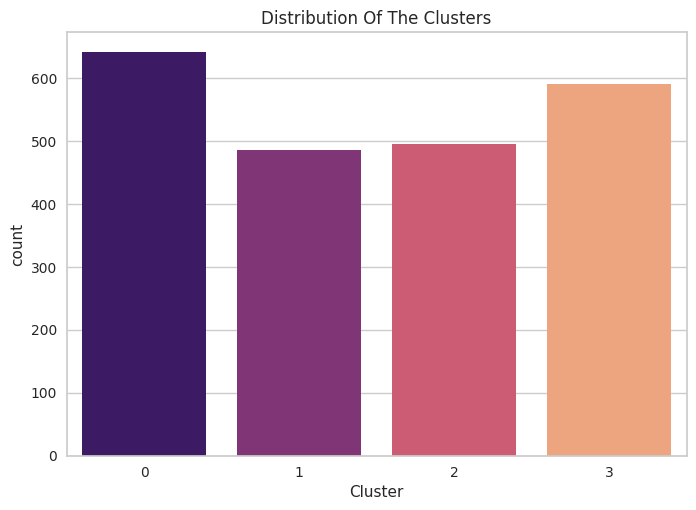

In [35]:
pl=sns.countplot(x=df['Cluster'],palette='magma')
pl.set_title('Distribution Of The Clusters')
plt.show()

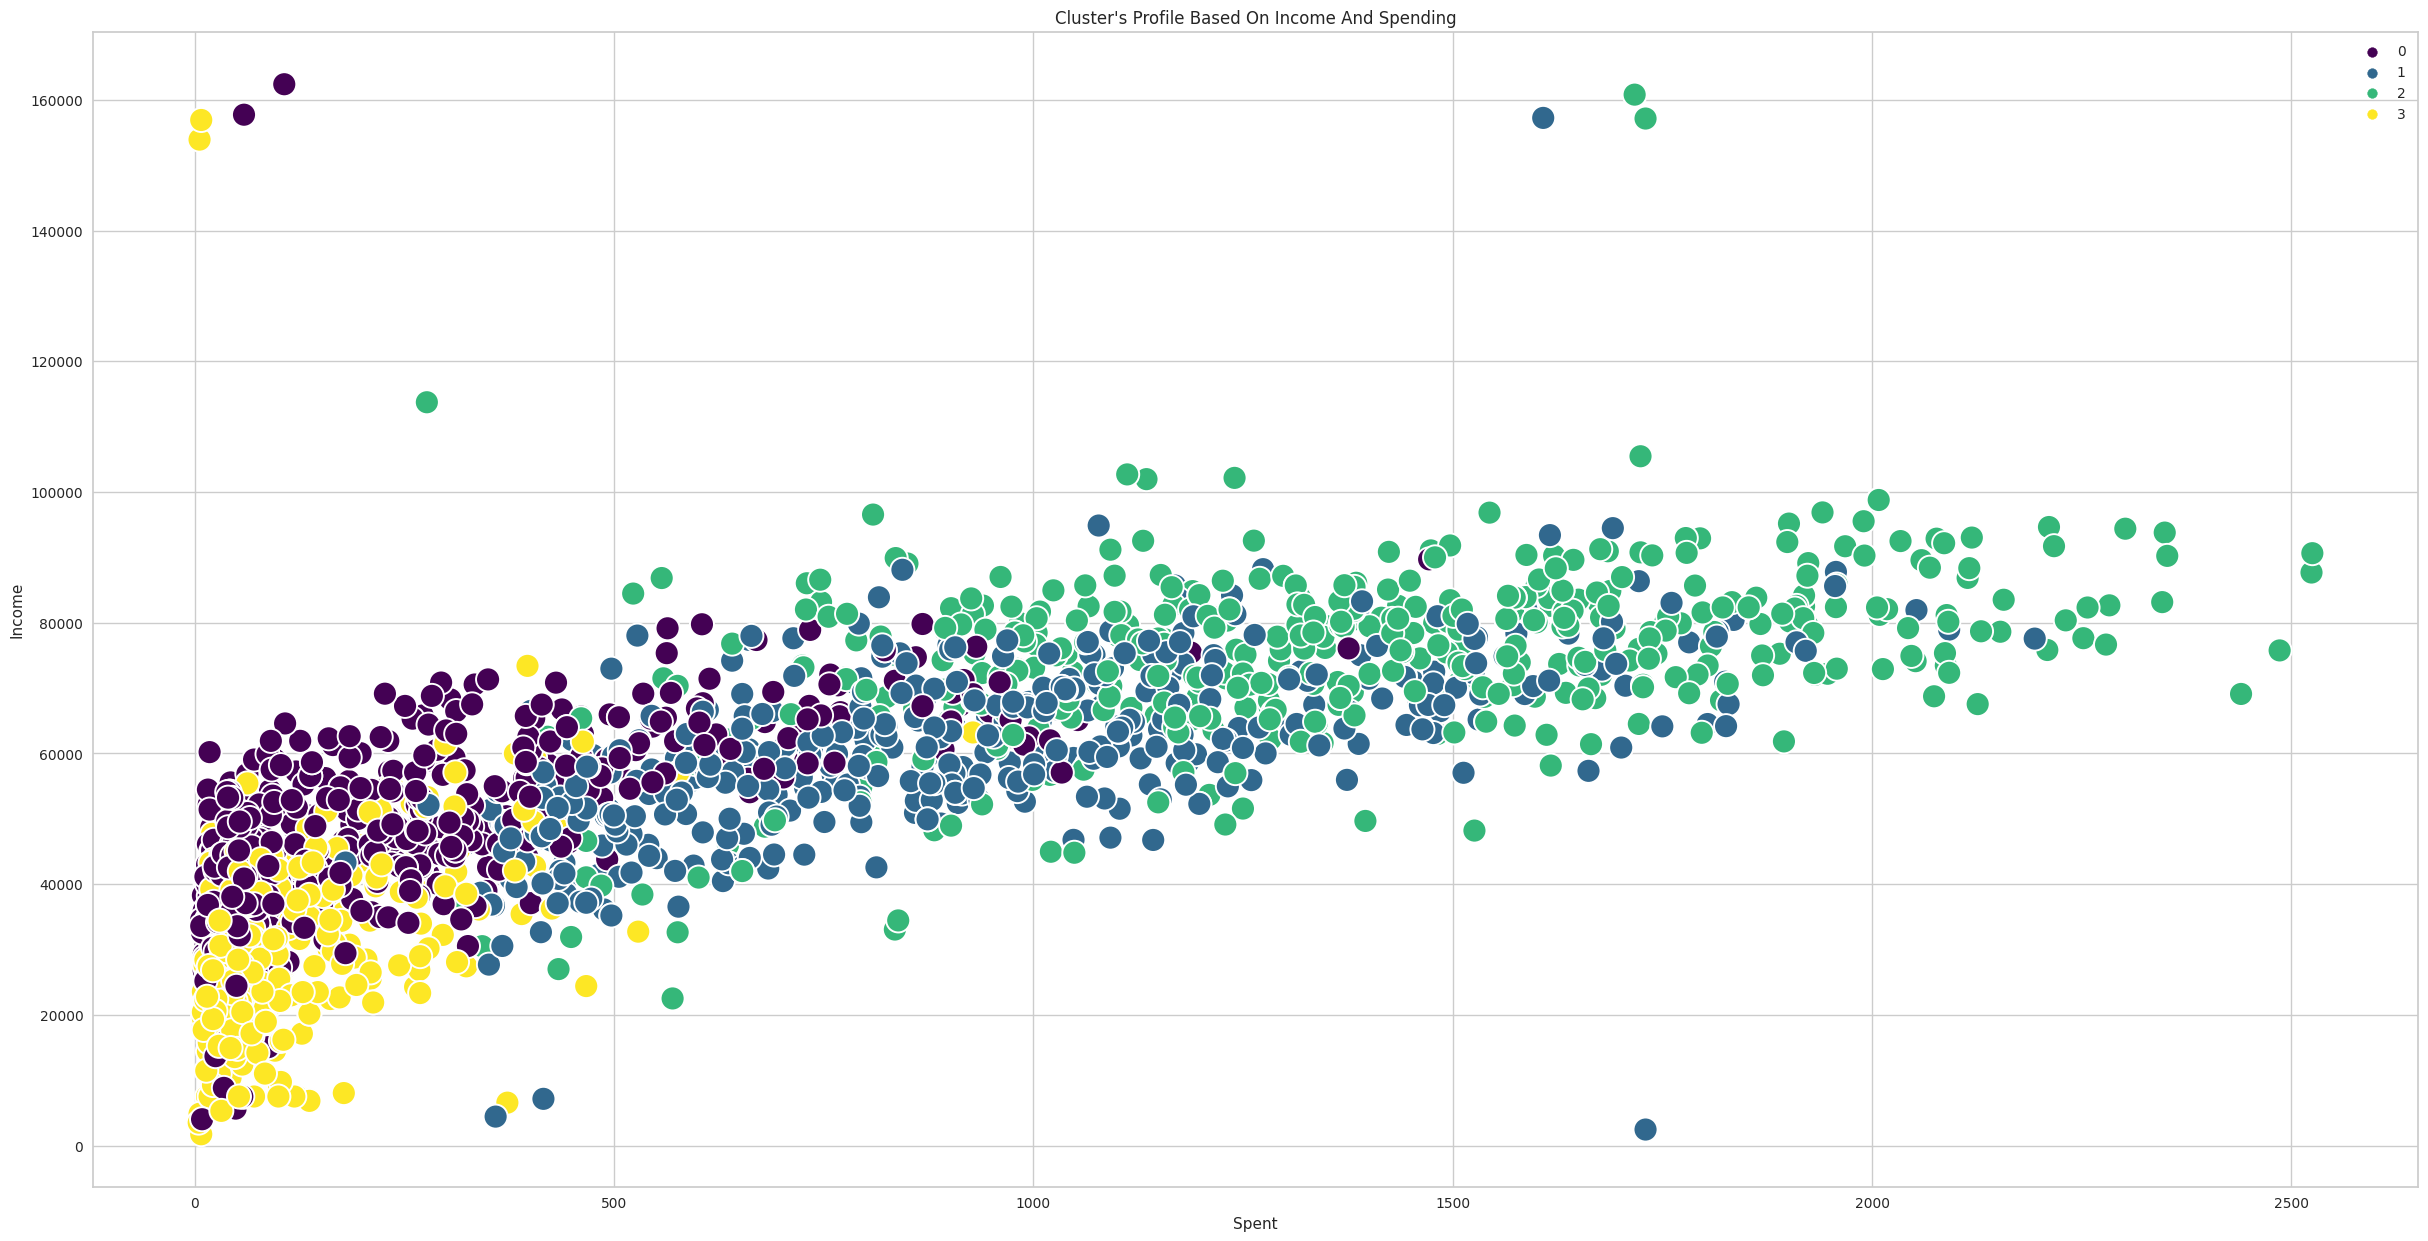

In [36]:
plt.figure(figsize=(30,15))
pl=sns.scatterplot(data = df,x=df["Spent"], y=df["Income"],hue=df["Cluster"], s=300,palette= 'viridis')
pl.set_title("Cluster's Profile Based On Income And Spending")
pl.set_xlabel('Spent')
plt.legend()
plt.show()

In [37]:
plt.figure(figsize=(30,25))
# Create data points for the scatter plot
trace = go.Scatter(
    x=df['Spent'],  
    y=df['Income'],  
    mode='markers',  
    marker=dict(
        size=7,  
        color=df['Cluster'],  
        colorscale='Viridis',  
        showscale=True  
    ),
    text=df['Cluster']  
)


data = [trace]
layout = go.Layout(
    title="Cluster's Profile Based On Income And Spending",
    xaxis=dict(title='Spent'),
    yaxis=dict(title='Income'),
    legend=dict(title='Cluster'),
    hovermode='closest',  
    width=1000,  
    height=700  
)

fig = go.Figure(data=data, layout=layout)


py.iplot(fig)

<Figure size 3000x2500 with 0 Axes>

In [38]:
# Create a Plotly Figure and a Scatter3d object
fig = go.Figure()


for cluster in df['Cluster'].unique():
    df_cluster = df[df['Cluster'] == cluster]
    fig.add_trace(go.Scatter3d(
        x=df_cluster['Spent'],  
        y=df_cluster['Income'],  
        z=df_cluster['Age'],     
        mode='markers',
        marker=dict(
            size=3,  
            
        ),name=f'Cluster {cluster}'  
        
    ))


fig.update_layout(
    title="Cluster's Profile Based On Income, Spending, and Age",
    scene=dict(
        xaxis_title='Spent',
        yaxis_title='Income',
        zaxis_title='Age'
    ),
    legend_title="Cluster"
)


fig.show()

## Income vs spending plot shows the clusters pattern

### group 0: high spending & average income
### group 1: high spending & high income
### group 2: low spending & low income
### group 3: high spending & low income
### Next, I will be looking at the detailed distribution of clusters as per the various products in the data. Namely: Wines, Fruits, Meat, Fish, Sweets and Gold

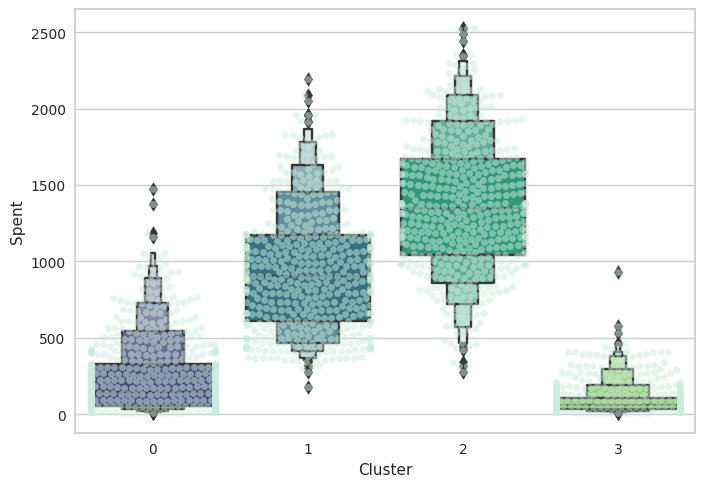

In [39]:
plt.figure()
sns.swarmplot(x=df['Cluster'],y=df['Spent'],color='#CBEDDD',alpha=0.5)
sns.boxenplot(x=df['Cluster'],y=df['Spent'],palette='viridis')
plt.show()

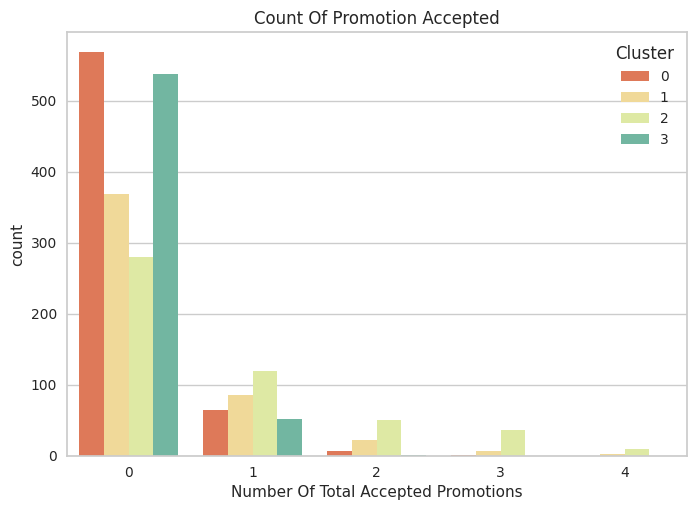

In [40]:
#Creating a feature to get the total of accepted promotions;
df['Total_Promos']=df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=df["Total_Promos"],hue=df["Cluster"], palette= 'Spectral')
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

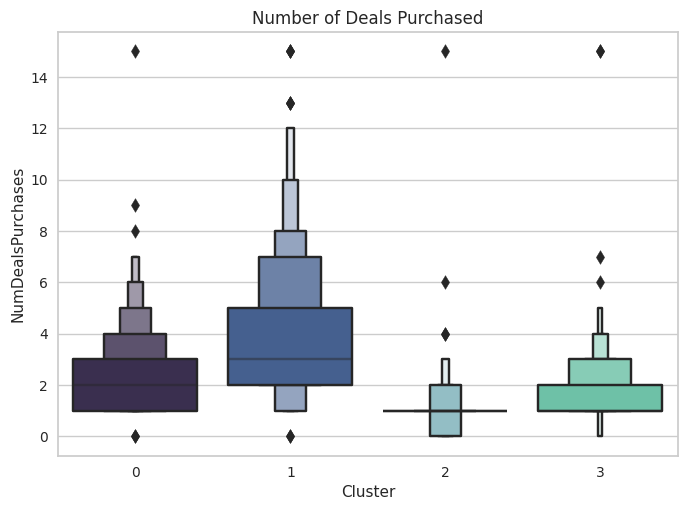

In [41]:
#Graph of the number of purchased deals;
plt.figure()
pl=sns.boxenplot(y=df["NumDealsPurchases"],x=df["Cluster"], palette= 'mako')
pl.set_title("Number of Deals Purchased")
plt.show()

# PROFILING;

<Figure size 800x550 with 0 Axes>

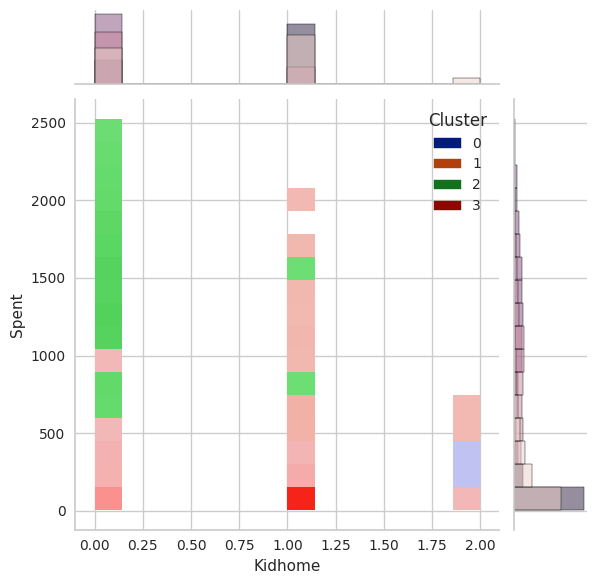

<Figure size 800x550 with 0 Axes>

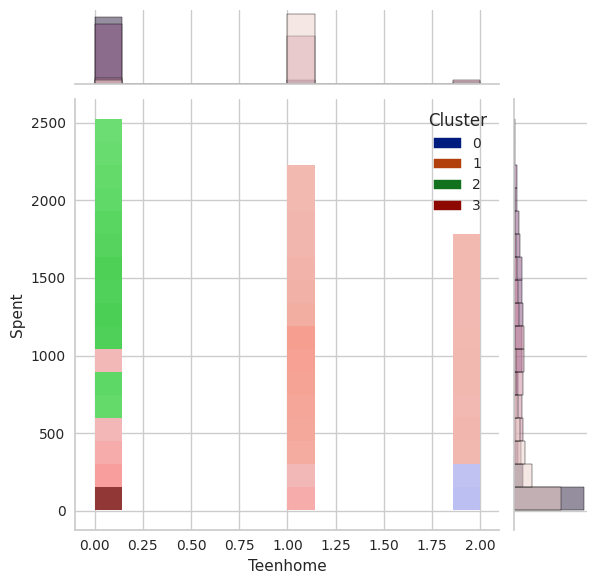

<Figure size 800x550 with 0 Axes>

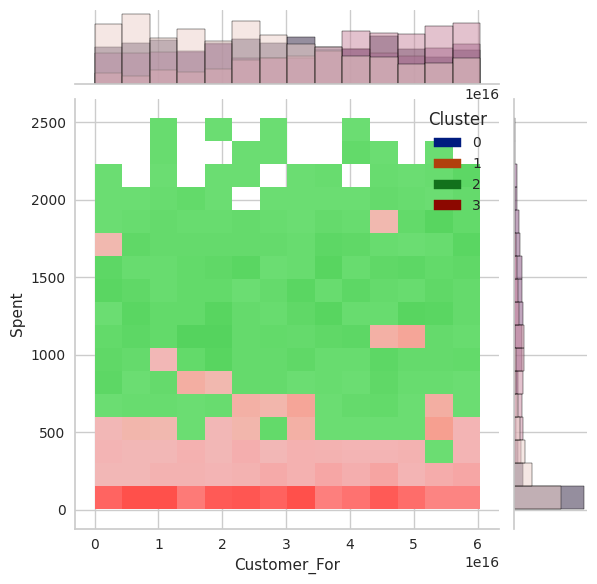

<Figure size 800x550 with 0 Axes>

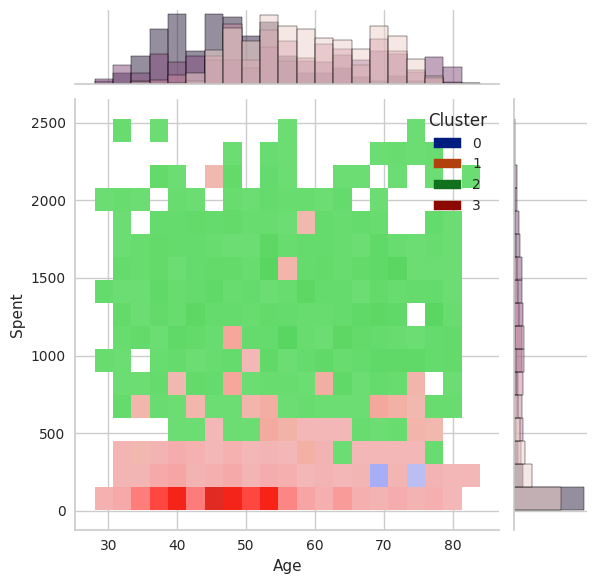

<Figure size 800x550 with 0 Axes>

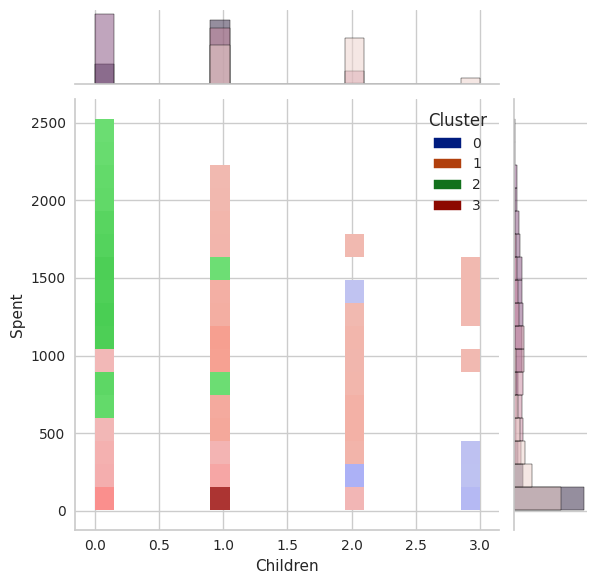

<Figure size 800x550 with 0 Axes>

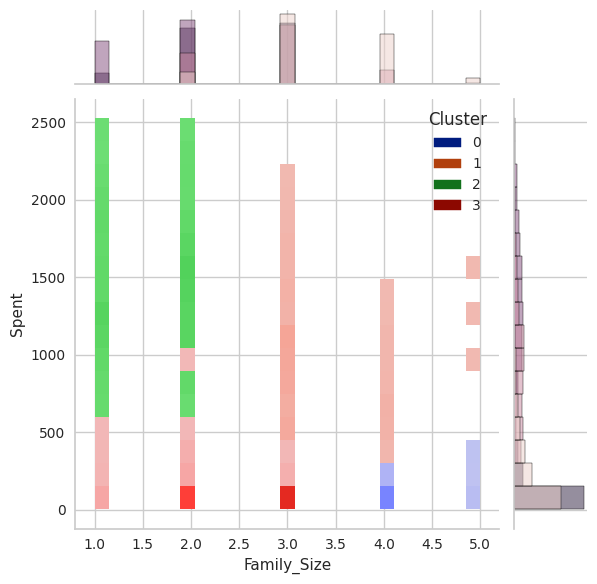

<Figure size 800x550 with 0 Axes>

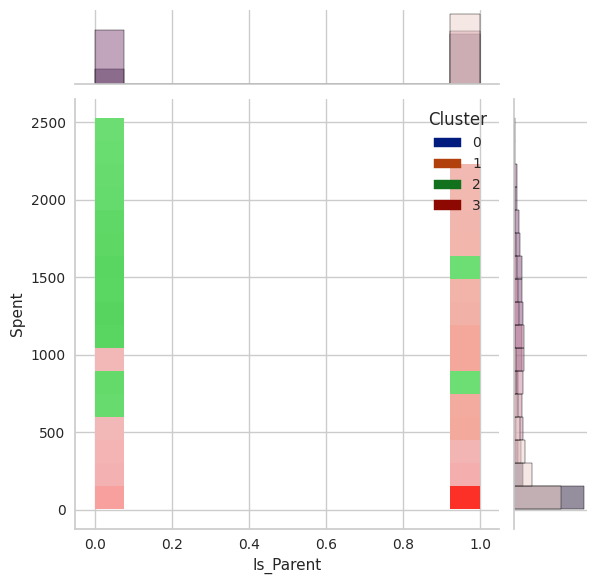

<Figure size 800x550 with 0 Axes>

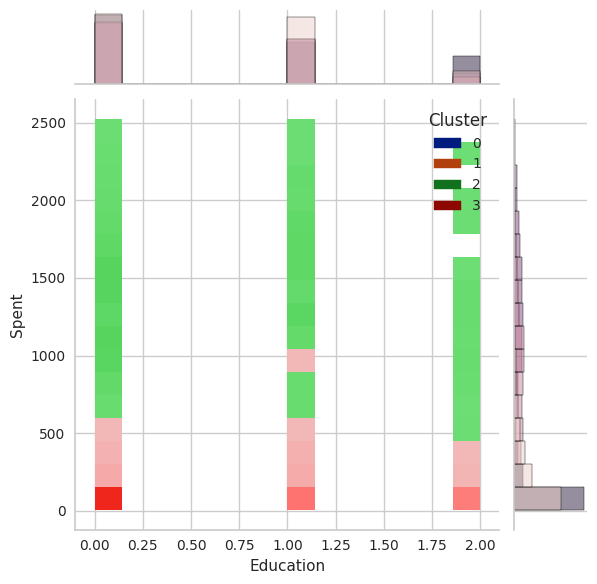

<Figure size 800x550 with 0 Axes>

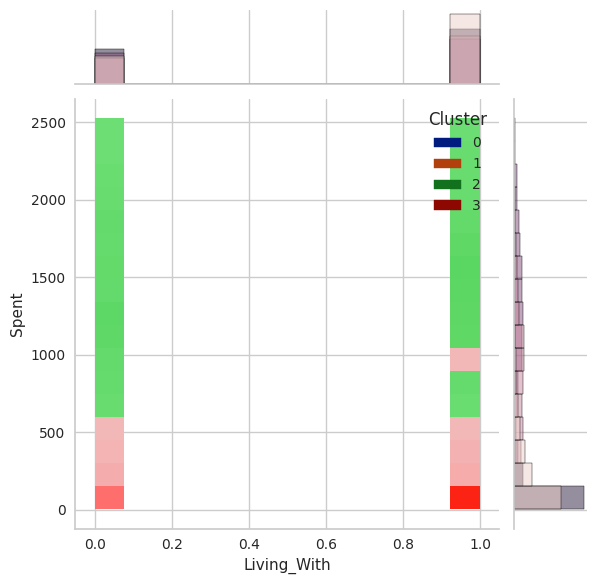

In [42]:
Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=df[i],y=df['Spent'],hue=df['Cluster'],kind='hist',palette='dark')
    plt.show()

# Cluster : 0 
### Are a definitely a parent 
### At the max have 4 members in the family and at least 2 
### Single parents are a subset of this group 
### Most have a teenager at home
### Relatively older  

# Cluster : 1
### Are a definitely a parent 
### At the max have 2 members in the family  
### A slight majority of couples over single people 
### Span all ages 
### A high income  group

# Cluster : 2 
### The majority of these people are parents
### At the max have 3 members in the family  
### The majority have one kid (and not teenagers, typically)
### Reality younger 

# Cluster : 3
### They are  definitely a parent
### At the max have 5 members in the family  and at least 2 
### Majority of them have a teenager at home 
### Reality older
### A lower-income group